## Pengujian teory darwin (seleksi alam species geospiza fortis di Galapagos Islands)
pada project kali ini saya akan melakukan analisis terhadap perubahan species burung di sebuah pulau terpencil di Galapagos Islands, pulau ini dipilih oleh karena tidak adanya interaksi habitat dengan manusia dan faktor luar lain sehingga proses seleksi alam terjadi hanya pada faktor yang bisa diamati dari pulau tersebut, data diambil dari tahun 1975 sampai 2012 oleh kelompok ilmuan dari princeton university bernama peter and rosemary grant.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Cleaning

In [50]:
# pembacaan data
df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')

In [51]:
df1[df1.species == 'scandens' ].head()

,band,species,"Beak length, mm","Beak depth, mm"
316,302,scandens,13.9,8.4
317,304,scandens,14.0,8.8
318,306,scandens,12.9,8.4
319,310,scandens,13.5,8.0
320,317,scandens,12.9,7.9


In [35]:
df2[df2.species == 'scandens' ].head()

,band,species,blength,bdepth,year
121,19026,scandens,14.3,9.4,2012
122,19028,scandens,12.5,8.9,2012
123,19029,scandens,13.7,9.5,2012
124,19094,scandens,13.8,11.0,2012
125,19122,scandens,12.0,8.7,2012


In [37]:
# rubah nama kolum sebelum kita gabung datanya
df1.columns = ['band', 'species', 'blength', 'bdepth', 'year']

In [38]:
df1[df1.species == 'scandens' ].head()

,band,species,blength,bdepth,year
316,302,scandens,13.9,8.4,1975
317,304,scandens,14.0,8.8,1975
318,306,scandens,12.9,8.4,1975
319,310,scandens,13.5,8.0,1975
320,317,scandens,12.9,7.9,1975


In [45]:
fortis = pd.concat([df1[df1.species == 'scandens' ], df2[df2.species == 'scandens' ]], sort=False, ignore_index=True)

In [46]:
fortis.head()

,band,species,blength,bdepth,year
0,302,scandens,13.9,8.4,1975
1,304,scandens,14.0,8.8,1975
2,306,scandens,12.9,8.4,1975
3,310,scandens,13.5,8.0,1975
4,317,scandens,12.9,7.9,1975


In [47]:
#kita akan buang data yang tidak kitabutuhkan
fortis.drop('band', axis=1)

,species,blength,bdepth,year
0,scandens,13.90,8.4,1975
1,scandens,14.00,8.8,1975
2,scandens,12.90,8.4,1975
3,scandens,13.50,8.0,1975
4,scandens,12.90,7.9,1975
5,scandens,14.60,8.9,1975
6,scandens,13.00,8.6,1975
7,scandens,14.20,8.5,1975
8,scandens,14.00,8.9,1975
9,scandens,14.20,9.1,1975


## EDA ( exploratory data analysis) dari panjang paruh burung geospiza fortis 


kita akan melihat bagaimana panjang paruh (jarak, atas ke bawah, paruh tertutup) spesies Geospiza scandens telah berubah dari waktu ke waktu.

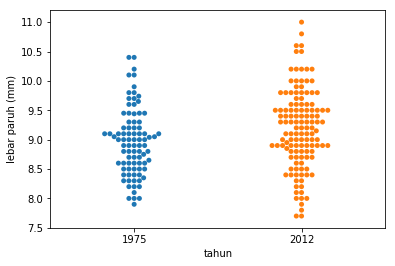

In [53]:
# buat tabel beeswarm dengan seaborn
_ = sns.swarmplot('year', 'bdepth', data=fortis)

_ = plt.xlabel('tahun')
_ = plt.ylabel('lebar paruh (mm)')

plt.show()

Agak sulit untuk melihat apakah ada perbedaan yang jelas antara data tahun 1975 dan 2012. akan tetapi, terlihat bahwa rata-rata data 2012 mungkin sedikit lebih tinggi, dan mungkin memiliki varian yang lebih besar.